In [55]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# Selenium'un Chrome sürücüsünü başlat
chromeOptions = webdriver.ChromeOptions() 
chromeOptions.add_argument("--incognito")
chromeOptions.add_argument("--headless")
driver = webdriver.Chrome(options=chromeOptions)
driver.maximize_window()
driver.delete_all_cookies()
driver.get("https://www.topuniversities.com/universities/koc-university")
driver.implicitly_wait(4)

# Verileri çek
scores = driver.find_elements(By.CLASS_NAME, "score")

score_list_koc = []

# İlk 10 skoru ekrana yazdır
for score in scores[:10]:
    score_list_koc.append(score.text)

print(score_list_koc)

# Tarayıcıyı kapat
driver.quit()


['26.2', '22.4', '47.3', '24', '28.6', '27.3', '11.2', '6.4', '11', '29.9']


In [56]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# Selenium'un Chrome sürücüsünü başlat
chromeOptions = webdriver.ChromeOptions() 
chromeOptions.add_argument("--incognito")
chromeOptions.add_argument("--headless")
driver = webdriver.Chrome(options=chromeOptions)
driver.maximize_window()
driver.delete_all_cookies()
driver.get("https://www.topuniversities.com/universities/bilkent-university")
driver.implicitly_wait(4)

# Verileri çek
scores = driver.find_elements(By.CLASS_NAME, "score")

score_list_bilkent = []

# İlk 10 skoru ekrana yazdır
for score in scores[:10]:
    score_list_bilkent.append(score.text)

print(score_list_bilkent)

# Tarayıcıyı kapat
driver.quit()


['23.1', '22.2', '44.9', '17.2', '12.9', '72', '5.7', '4.1', '14.3', '14.2']


In [171]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# Selenium'un Chrome sürücüsünü başlat
chromeOptions = webdriver.ChromeOptions() 
chromeOptions.add_argument("--incognito")
chromeOptions.add_argument("--headless")
driver = webdriver.Chrome(options=chromeOptions)
driver.maximize_window()
driver.delete_all_cookies()
driver.get("https://www.topuniversities.com/universities/sabanci-university")
driver.implicitly_wait(4)

# Verileri çek
scores = driver.find_elements(By.CLASS_NAME, "score")

score_list_sabancı = []

# İlk 10 skoru ekrana yazdır
for score in scores[:10]:
    score_list_sabancı.append(score.text)

print(score_list_sabancı)

# Tarayıcıyı kapat
driver.quit()

['22.3', '18.1', '37.5', '34.5', '19.2', '37', '15', '1.8', '11.2', '15.4']


In [172]:
import pandas as pd

z = ["Genel","Akademik İtibar","İşveren İtibarı","Öğretim Üyesi Öğrenci Oranı","Öğretim Üyesi Başına Alıntı","Uluslararası Öğretim Üyesi Oranı","Uluslararası Öğrenci Oranı","Uluslararası Araştırma Networkü","İşveren Çıktıları","Sürdürebilirlik"]

df = pd.DataFrame({'Üniversiteler': z, 'Koç': score_list_koc, 'Bilkent': score_list_bilkent, 'Sabancı': score_list_sabancı})

df = df.transpose()

df.columns = df.iloc[0]
df = df[1:]

for col in z:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df.columns

df = df.rename_axis('Üniversiteler').reset_index()

df = df.rename_axis(columns='Konu')

df

Konu,Üniversiteler,Genel,Akademik İtibar,İşveren İtibarı,Öğretim Üyesi Öğrenci Oranı,Öğretim Üyesi Başına Alıntı,Uluslararası Öğretim Üyesi Oranı,Uluslararası Öğrenci Oranı,Uluslararası Araştırma Networkü,İşveren Çıktıları,Sürdürebilirlik
0,Koç,26.2,22.4,47.3,24.0,28.6,27.3,11.2,6.4,11.0,29.9
1,Bilkent,23.1,22.2,44.9,17.2,12.9,72.0,5.7,4.1,14.3,14.2
2,Sabancı,22.3,18.1,37.5,34.5,19.2,37.0,15.0,1.8,11.2,15.4


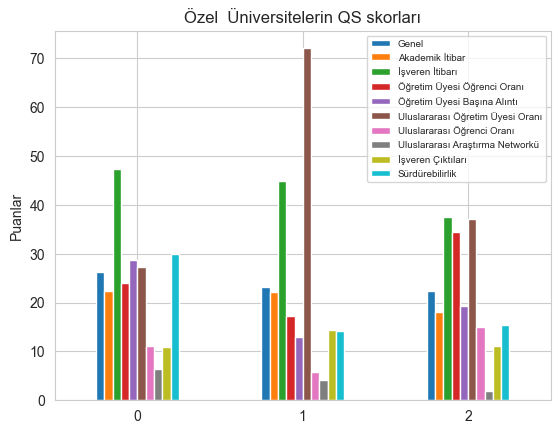

In [176]:
df.plot(kind='bar')
sns.set_style("whitegrid")
plt.ylabel('Puanlar')
plt.xticks(rotation=360)
plt.legend(loc="upper right", fontsize = 7)
plt.title('Özel  Üniversitelerin QS skorları')
plt.show()

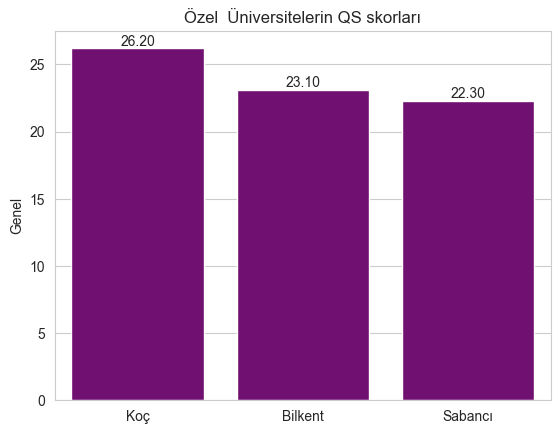

In [342]:
import seaborn as sns

ax = sns.barplot(x = "Üniversiteler", y = "Genel", data = df, color= "purple")
ax.set_xlabel('')

plt.title('Özel  Üniversitelerin QS skorları')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=10)

(0.0, 30.0)

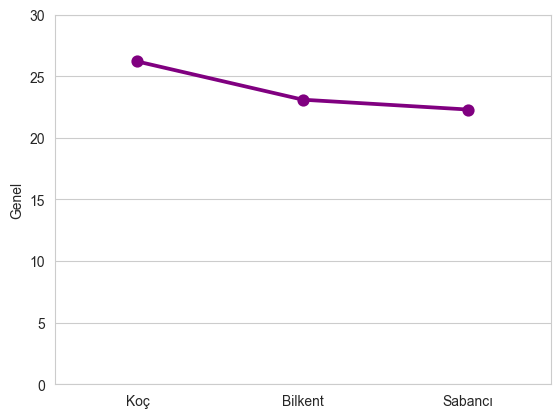

In [204]:
ax = sns.pointplot(x='Üniversiteler', y='Genel', data=df, color="purple")
ax.set_xlabel('')
plt.ylim(0, 30)

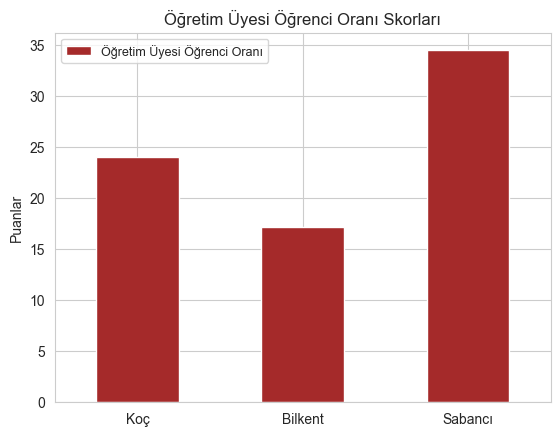

In [343]:
ax = df.plot(x = "Üniversiteler", y = "Öğretim Üyesi Öğrenci Oranı", kind='bar', color="#A52A2A")
sns.set_style("whitegrid")
plt.ylabel('Puanlar')
plt.xticks(rotation=360)
plt.legend(loc="upper left", fontsize = 9)
plt.title('Öğretim Üyesi Öğrenci Oranı Skorları')
ax.set_xlabel('')
plt.show()

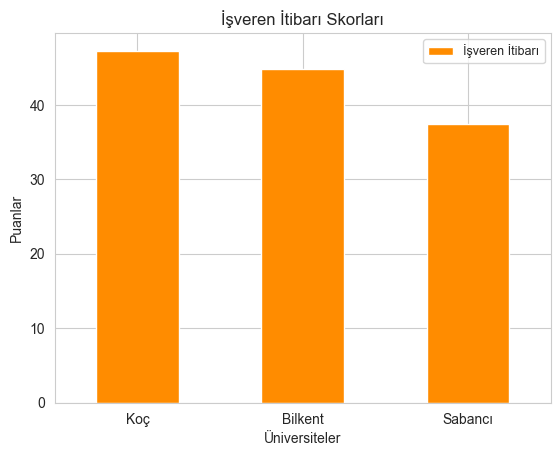

In [344]:
ax = df.plot(x = "Üniversiteler", y = "İşveren İtibarı", kind='bar', color="#FF8C00")
sns.set_style("whitegrid")
plt.ylabel('Puanlar')
plt.xticks(rotation=360)
plt.legend(loc="upper right", fontsize = 9)
plt.title('İşveren İtibarı Skorları')
plt.show()

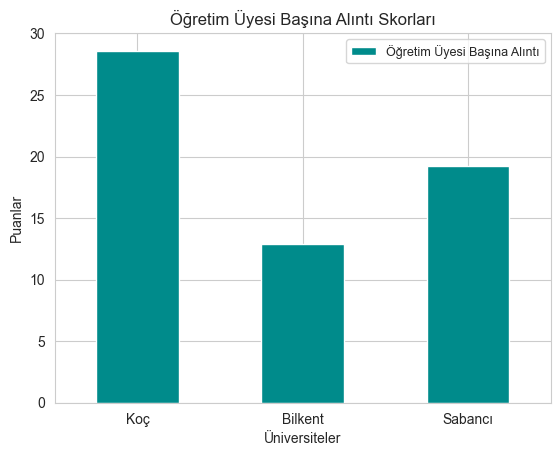

In [345]:
ax = df.plot(x = "Üniversiteler", y = "Öğretim Üyesi Başına Alıntı", kind='bar', color="#008B8B")
sns.set_style("whitegrid")
plt.ylabel('Puanlar')
plt.xticks(rotation=360)
plt.legend(loc="upper right", fontsize = 9)
plt.title('Öğretim Üyesi Başına Alıntı Skorları')
plt.show()

Text(0.5, 1.0, 'Uluslararası Öğretim Üyesi Oranı Skorları')

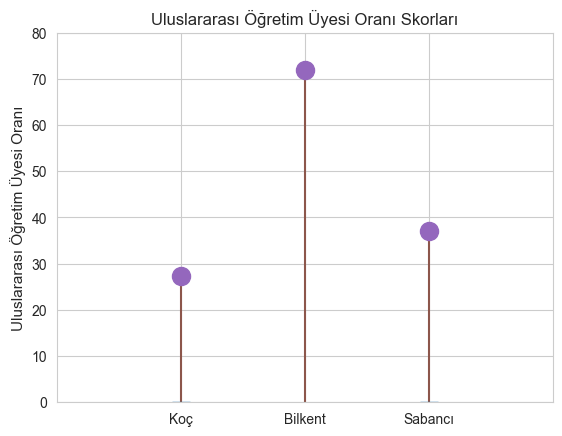

In [356]:
plt.stem(df['Üniversiteler'], df['Uluslararası Öğretim Üyesi Oranı'], linefmt='C5', markerfmt='oC4', basefmt='_')
for line in plt.gca().lines:
    line.set_markersize(13)
plt.ylim(0, 80)
plt.margins(x=0.5)
plt.ylabel('Uluslararası Öğretim Üyesi Oranı', size=11)
plt.title("Uluslararası Öğretim Üyesi Oranı Skorları")


Text(0.5, 1.0, 'Uluslararası Öğrenci Oranı Skorları')

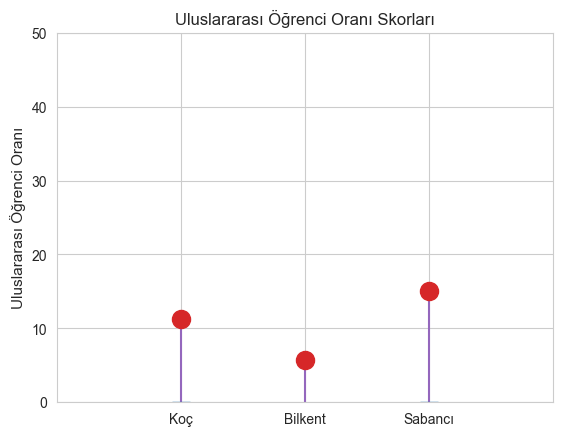

In [366]:
plt.stem(df['Üniversiteler'], df['Uluslararası Öğrenci Oranı'], linefmt='C4', markerfmt='oC3', basefmt='_')
for line in plt.gca().lines:
    line.set_markersize(13)
plt.ylim(0, 50)
plt.margins(x=0.5)
plt.ylabel('Uluslararası Öğrenci Oranı', size=11)
plt.title("Uluslararası Öğrenci Oranı Skorları")


Text(0.5, 1.0, 'Uluslararası Araştırma Networkü Skorları')

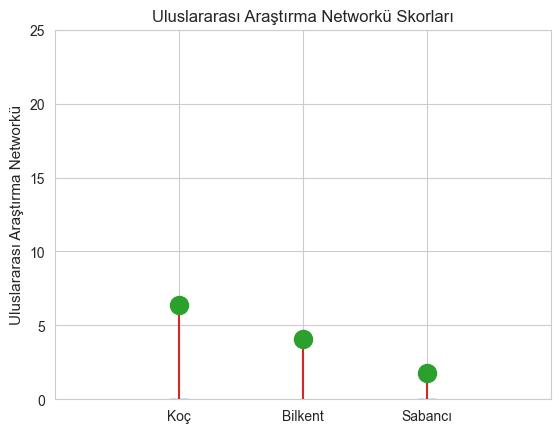

In [367]:
plt.stem(df['Üniversiteler'], df['Uluslararası Araştırma Networkü'], linefmt='C3', markerfmt='oC2', basefmt='_')
for line in plt.gca().lines:
    line.set_markersize(13)
plt.ylim(0, 25)
plt.margins(x=0.5)
plt.ylabel('Uluslararası Araştırma Networkü', size=11)
plt.title("Uluslararası Araştırma Networkü Skorları")

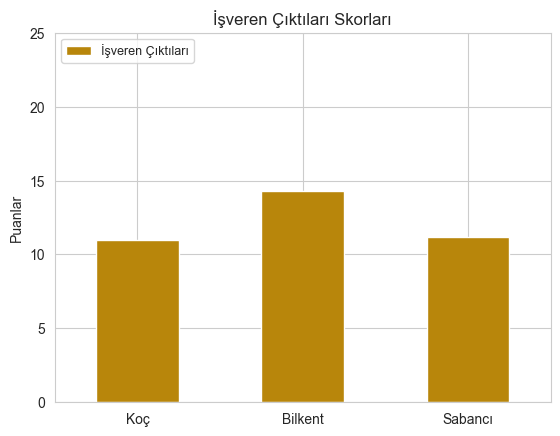

In [374]:
ax = df.plot(x = "Üniversiteler", y = "İşveren Çıktıları", kind='bar', color="#B8860B")
sns.set_style("whitegrid")
plt.ylabel('Puanlar')
plt.xticks(rotation=360)
plt.legend(loc="upper left", fontsize = 9)
plt.title('İşveren Çıktıları Skorları')
ax.set_xlabel('')
plt.ylim(0, 25)
plt.show()

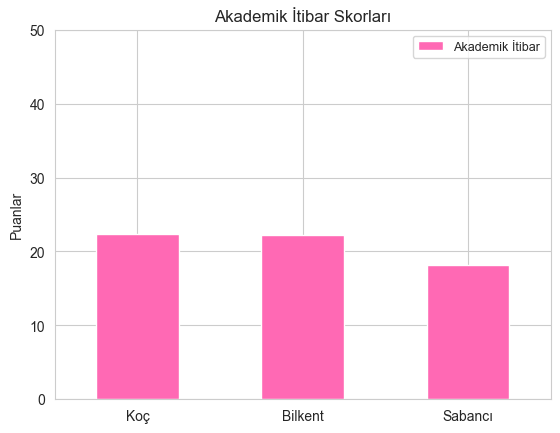

In [379]:
ax = df.plot(x = "Üniversiteler", y = "Akademik İtibar", kind='bar', color="#FF69B4")
sns.set_style("whitegrid")
plt.ylabel('Puanlar')
plt.xticks(rotation=360)
plt.legend(loc="upper right", fontsize = 9)
plt.title('Akademik İtibar Skorları')
ax.set_xlabel('')
plt.ylim(0, 50)
plt.show()